## rR-Analyzer

- read data sets from a folder
- spline all data sets on a similar x-axis
- background correction of the data
- normalize data to a given peak (*e.g.* solvent)
- subtract spectra (*e.g.* solvent)
- write ASCII of manipulated data
- find peaks and write ASCII including peak positions and their relative intensities

In [1]:
from __future__ import division,unicode_literals
import scipy.constants as const

import sys, os
sys.path.append("/home/carom/git_projects/rR_Analyzer/")
import numpy as np 
import pandas as pd
import pylab
import matplotlib

import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.cm as cm

import scipy
import scipy.stats as stats
from scipy.interpolate import interp1d
from scipy import signal

import rR_analyser as rR

### Read and average data with multiple frames

- reads data with multiple frames from a subfolder
- plots the data of the single frames in the given spectral window
- averages the data as specified in ``` average_start```  and ``` average_end``` 

Number of x-points = 5800
File (rR_Ru_643nm_20spectra_reduction.txt) No.0 -> 24 frames


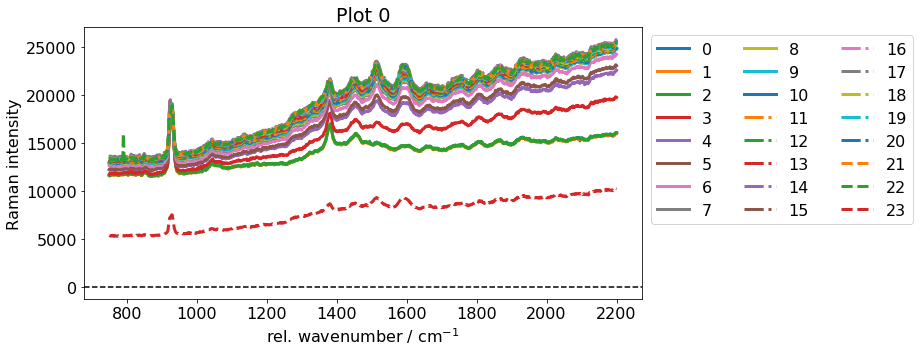

In [2]:
foldername = 'example_data'
subfoldername = 'multiple_spectra'
rR_A = rR.rR_Analyzer(path=os.getcwd())
rR_A.read_frames(foldername=foldername,
                 subfoldername=subfoldername,
                 file_ending='.txt',
                 xmin=750,
                 xmax=2200,
                 steps=None)

In [3]:
rR_A.average_frames(number=[0,0],
                average_start=[0,10],
                average_end=[5,20],
                specification=['ocp','red'])

Averaged files are written to the folder.


### Work with the averaged files or files with a single spectrum

In [4]:
rR_A.read_files(foldername=foldername, 
                end='.txt', 
                xmin=750, 
                xmax=2200,
                steps=None)

Number of x-points = 5800


### Baseline Correction

- ``` 
ZhangFit
```: Zhi-Min Zhang, Shan Chena and Yi-Zeng Liang, Baseline correction using adaptive iteratively reweighted penalized least squares, *Analyst*, **2010**, *135*, 1138-1146 (https://doi.org/10.1039/B922045C)

- ``` 
ModPoly
```: Chad A. Lieber, Anita Mahadevan-Jansen, Automated Method for Subtraction of Fluorescence from Biological Raman Spectra, *Applied Spectroscopy*, **2003**, 57, *11*, 1363-1367 (https://doi.org/10.1366/000370203322554518)

- ``` 
IModPoly
```: Jianhua Zhao, Harvey Lui, David I. McLean, Haishan Zeng, Automated Autofluorescence Background Subtraction Algorithm for Biomedical Raman Spectroscopy, *Applied Spectroscopy*, **2007**, 61, *11*, 1225-1232 (https://doi.org/10.1366/000370207782597003)


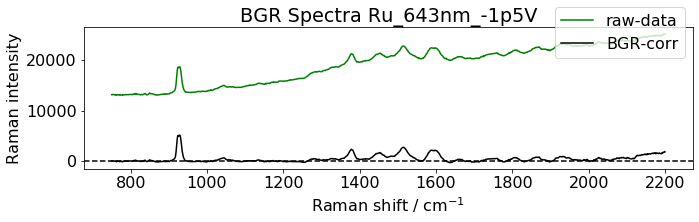

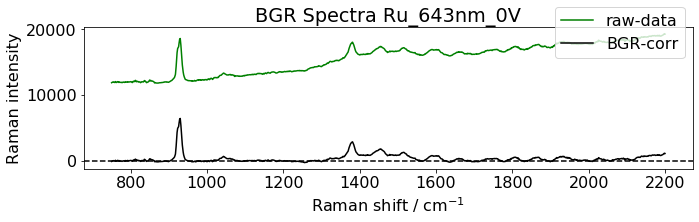

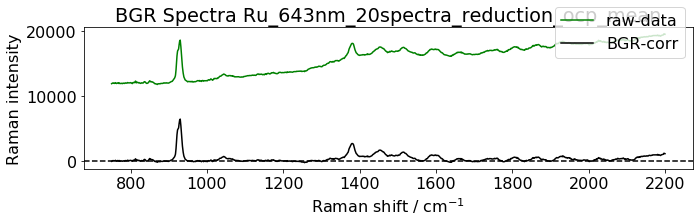

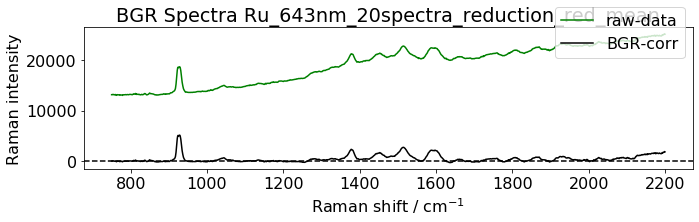

In [13]:
rR_bgr = rR_A.BGR_corr(method='ZhangFit', 
                       lambda_=10000, 
                       porder=3, 
                       itermax=35, 
                       savefig=True)

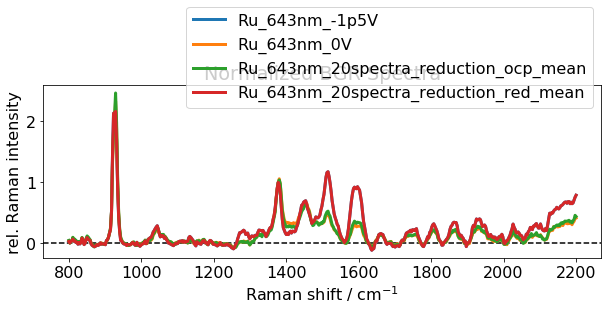

In [14]:
rR_norm = rR_bgr.norm_peak(peak=1373,
               bnd=5,
               xmin_p = 800,
               xmax_p = 2200,
               steps=500,
               figurename = 'norm',
               savefig=False)

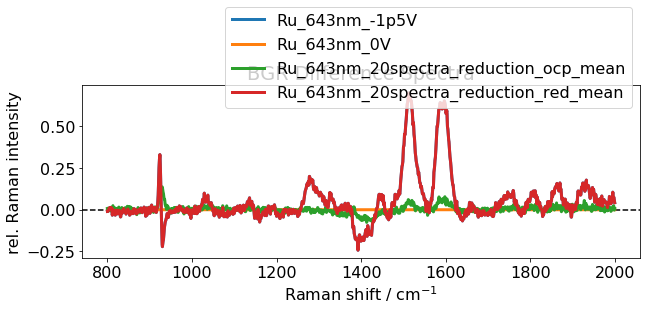

In [15]:
rR_diff = rR_norm.subtract_solvent(solvent_index=1,
                      xmin_p=800, 
                      xmax_p=2000, 
                      steps=None, 
                      savefig=False)


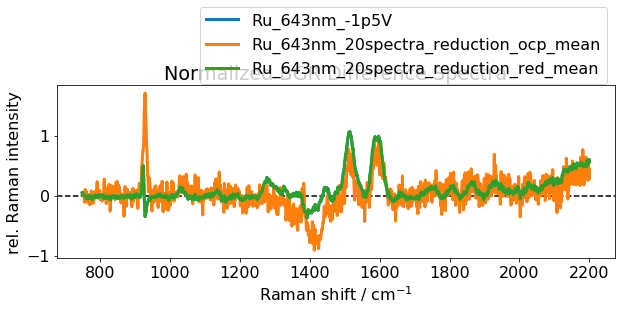

In [16]:
rR_final = rR_diff.norm_peak(peak=1605,
               bnd=20,
               xmin_p = 750,
               xmax_p = 2200,
               steps=2000,
               figurename = 'norm',
               savefig=False)

### Write Files

- write manipulated data for plotting
- write peaks and their respective rel. intensity (of the normalized data)

In [17]:
rR_final.write_data(name='manipulated_data')
rR_final.write_peaks(name='peak_data',
                     minimum=0.2)